`import` imp module

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


`Check Smaple data`

In [4]:
crops_data_01 =  pd.read_csv('../DataSet/dataset.csv')

`.head()` =>  it returns the Top 5 rows.

In [5]:
crops_data_01.head()

N   P    K   ph    EC     S     Cu      Fe     Mn     Zn      B  \
0  143  69  217  5.9  0.58  0.23  10.20  116.35  59.96  54.85  21.29   
1  170  36  216  5.9  0.15  0.28  15.69  114.20  56.87  31.28  28.62   
2  158  66  219  6.8  0.34  0.20  15.29   65.87  51.81  57.12  27.59   
3  133  45  207  6.4  0.94  0.21   8.48  103.10  43.81  68.50  47.29   
4  132  48  218  6.7  0.54  0.19   5.59   63.40  56.40  46.71  31.04   

         label  
0  pomegranate  
1  pomegranate  
2  pomegranate  
3  pomegranate  
4  pomegranate

In [6]:
crops_data_01.shape

(620, 12)

`.tail()` =>  it returns the last 5 rows.

In [7]:
crops_data_01.tail()

N   P    K   ph    EC        S    Cu    Fe      Mn     Zn      B  \
615   41  23  135  5.0  1.67  0.10655  26.0  39.2  206.89  31.09  20.64   
616   49  45   90  5.8  1.98  0.09229  19.0  40.2   91.12  32.68  14.91   
617  131  24  121  4.9  2.24  0.08775  22.0  40.0   94.34  24.93  23.74   
618  131  55  130  5.3  2.48  0.08983  15.0  41.0   92.58  45.73  21.48   
619  129  34  160  4.8  1.08  0.08869  25.0  39.0  259.93  33.49  14.16   

      label  
615  potato  
616  potato  
617  potato  
618  potato  
619  potato

`.unique()` It will give the unique value from following column

In [8]:
crops_data_01['label'].unique()

array(['pomegranate', 'mango', 'grapes', 'mulberry', 'ragi', 'potato'],
      dtype=object)

In [9]:
crops_data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       620 non-null    int64  
 1   P       620 non-null    int64  
 2   K       620 non-null    int64  
 3   ph      620 non-null    float64
 4   EC      620 non-null    float64
 5   S       620 non-null    float64
 6   Cu      620 non-null    float64
 7   Fe      620 non-null    float64
 8   Mn      620 non-null    float64
 9   Zn      620 non-null    float64
 10  B       620 non-null    float64
 11  label   620 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 58.3+ KB


There is `No Null` value

In [10]:
crops_data_01.columns

Index(['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B', 'label'], dtype='object')

In [11]:
crops_data_01.rename(columns= {'ph':'PH'}, inplace=True)
crops_data_01.head()

N   P    K   PH    EC     S     Cu      Fe     Mn     Zn      B  \
0  143  69  217  5.9  0.58  0.23  10.20  116.35  59.96  54.85  21.29   
1  170  36  216  5.9  0.15  0.28  15.69  114.20  56.87  31.28  28.62   
2  158  66  219  6.8  0.34  0.20  15.29   65.87  51.81  57.12  27.59   
3  133  45  207  6.4  0.94  0.21   8.48  103.10  43.81  68.50  47.29   
4  132  48  218  6.7  0.54  0.19   5.59   63.40  56.40  46.71  31.04   

         label  
0  pomegranate  
1  pomegranate  
2  pomegranate  
3  pomegranate  
4  pomegranate

In [12]:
crops_data_01.dtypes

N          int64
P          int64
K          int64
PH       float64
EC       float64
S        float64
Cu       float64
Fe       float64
Mn       float64
Zn       float64
B        float64
label     object
dtype: object

In [13]:
crops_data_01.describe()

N           P           K          PH          EC           S  \
count  620.000000  620.000000  620.000000  620.000000  620.000000  620.000000   
mean   135.701613   52.508065  161.401613    6.106290    0.885468    0.484085   
std     31.808083   24.673538   81.285780    0.693782    0.637214    5.775388   
min     30.000000   10.000000   51.000000    4.500000    0.010000    0.011100   
25%    116.000000   30.000000   89.000000    5.700000    0.297500    0.086000   
50%    138.000000   54.000000  157.500000    6.100000    0.780000    0.168000   
75%    160.000000   75.000000  206.000000    6.500000    1.390000    0.240000   
max    198.000000  100.000000  369.000000    8.000000    2.480000  113.200000   

               Cu          Fe           Mn          Zn           B  
count  620.000000  620.000000   620.000000  620.000000  620.000000  
mean    17.315452  117.212500   219.905887   34.340839   28.750710  
std      6.441150   62.775199   341.998793   11.543871   19.636447  
min      0.180000    3.810000    20.580000   17.990000    1.020000  
25%     12.592500   68.312500    58.785000   24.727500   13.442500  
50%     16.910000  108.245000    73.580000   31.425000   23.225000  
75%     21.102500  155.620000   163.665000   43.542500   42.767500  
max     35.000000  276.720000  1572.540000   70.000000   74.560000

In [14]:
crops_data_01.isnull().sum()

N        0
P        0
K        0
PH       0
EC       0
S        0
Cu       0
Fe       0
Mn       0
Zn       0
B        0
label    0
dtype: int64

C:\Users\piyus\AppData\Local\Temp\ipykernel_15336\3080535856.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plotted_data = sns.countplot(x = crops_data_01['label'], palette = 'Paired');
C:\Users\piyus\AppData\Local\Temp\ipykernel_15336\3080535856.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plotted_data = plotted_data.set_xticklabels([crops_data_01['label'].unique()]);


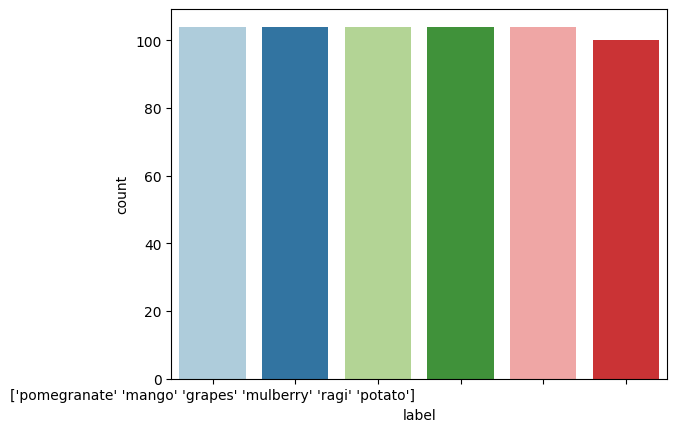

In [15]:
plotted_data = sns.countplot(x = crops_data_01['label'], palette = 'Paired');
plotted_data = plotted_data.set_xticklabels([crops_data_01['label'].unique()]);

`Train` Dataset

In [16]:
sample_value = crops_data_01.iloc[:,:11]
label_data = crops_data_01['label']
X_train, X_test, y_train, y_test = train_test_split(sample_value, label_data, train_size=0.8, random_state=42, stratify=label_data)

In [17]:
y_train.value_counts()

label
mango          84
pomegranate    83
mulberry       83
ragi           83
grapes         83
potato         80
Name: count, dtype: int64

In [18]:
features = X_train.columns
train = pd.concat([X_train, y_train], axis=1)

`Outlier` Detection

In [19]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)

    outlier_indices_counter = Counter(outlier_indices)        
    multiple_outliers = [ k for k, v in outlier_indices_counter.items() if v > n]
    
    return multiple_outliers, outlier_indices

In [20]:
outliers_to_drop, outliers = detect_outliers(X_train, 2, features)
print(f"{len(outliers)} samples contain outliers, {len(outliers_to_drop)} of them are outliers in more then two features.")

94 samples contain outliers, 0 of them are outliers in more then two features.


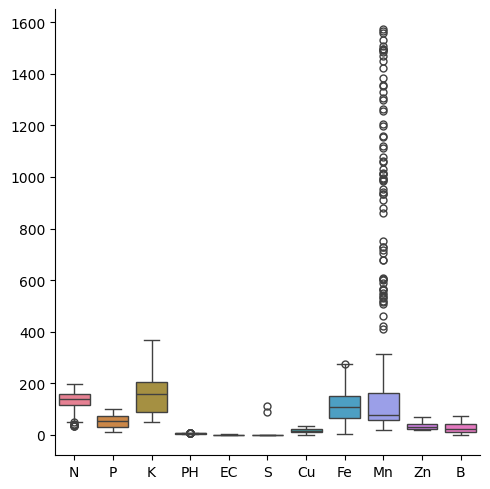

In [21]:
sns.catplot(data = X_train, kind = 'box')

<Axes: ylabel='Mn'>

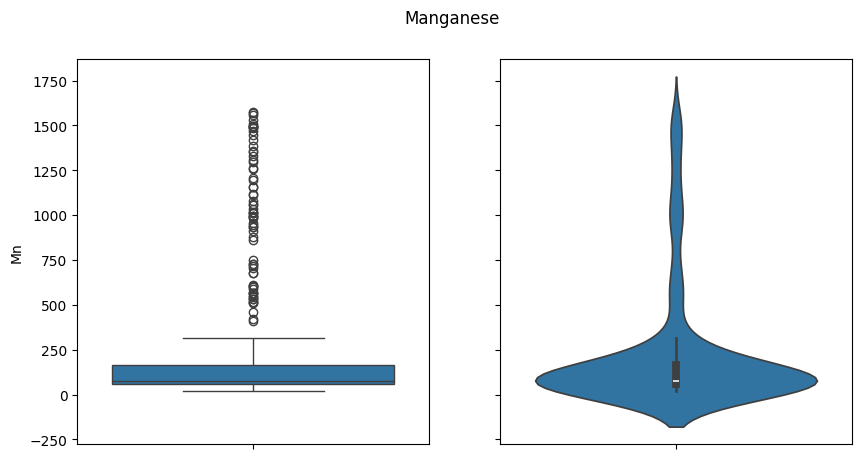

In [22]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharey=True)
fig.suptitle('Manganese')
sns.boxplot(ax=axs[0], y='Mn',  data=X_train)
sns.violinplot(ax=axs[1], y='Mn',  data=X_train)

In [23]:
feat_without_Mn = features.drop(['Mn'])

In [24]:
outliers_to_drop, outliers = detect_outliers(X_train, 2, feat_without_Mn)
print(f"{len(outliers)} samples contain outliers, {len(outliers_to_drop)} of them are outliers in more then two features.")

24 samples contain outliers, 0 of them are outliers in more then two features.


<Axes: ylabel='S'>

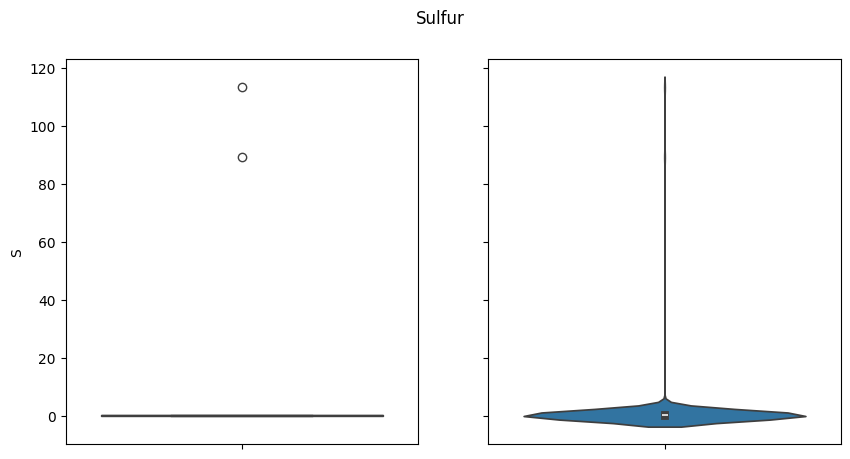

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10, 5), sharey=True)
fig.suptitle('Sulfur')
sns.boxplot(ax=ax[0], y='S',  data=X_train)
sns.violinplot(ax=ax[1], y='S',  data=X_train)

`Droping outlayer`

In [26]:
outliers_to_drop, S_outlayer_indecies = detect_outliers(X_train, 1, 'S')

In [27]:
S_outlayer_indecies

[414, 415]

In [28]:
X_train = X_train.drop(S_outlayer_indecies, axis = 0).reset_index(drop = True)
y_train = y_train.drop(S_outlayer_indecies, axis = 0).reset_index(drop = True)
train =train.drop(S_outlayer_indecies, axis = 0).reset_index(drop = True)

In [29]:
skewed_feast = X_train.apply(lambda x: x.skew()).sort_values(ascending = False)
skewed_data = pd.DataFrame({'skew': skewed_feast})
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
skewed_data.head(11)

skew
Mn  2.523
Zn  0.733
Fe  0.702
K   0.680
EC  0.670
B   0.645
Cu  0.449
PH -0.011
S  -0.055
P  -0.072
N  -0.690

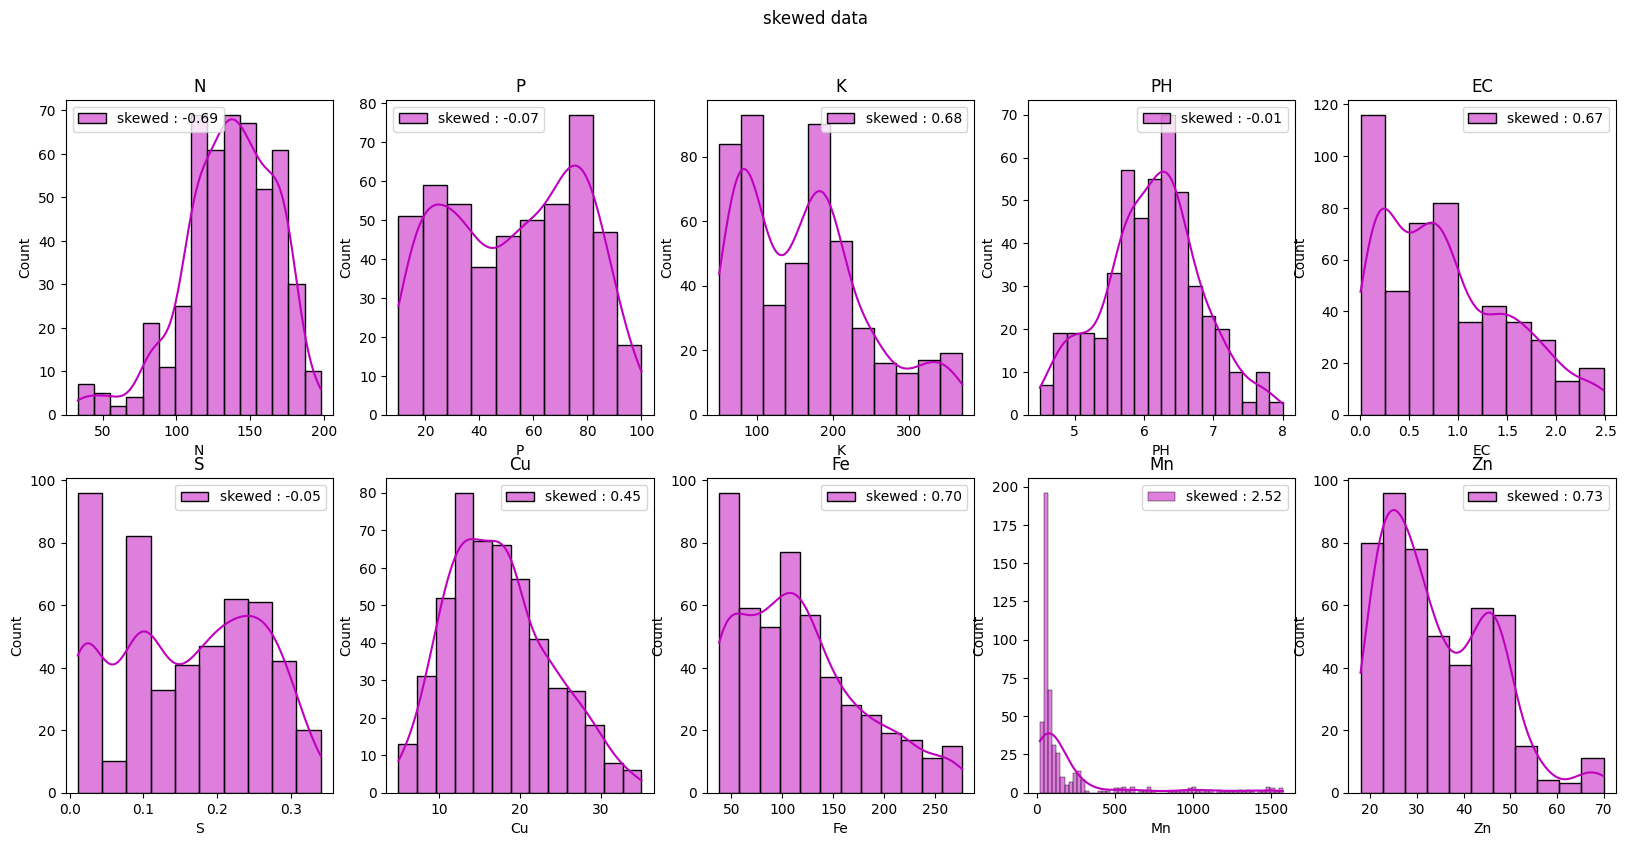

In [30]:
features = X_train.columns

fig, axis = plt.subplots(2,5 , figsize = (20, 9))
fig.suptitle('skewed data')
for i, ax in enumerate(axis.ravel()):
    value = sns.histplot(X_train.iloc[:,i], color = 'm', label = 'skewed : %.2f'% (X_train.iloc[:,i].skew()), ax = ax, kde = True)
    value = value.legend(loc = 'best')
    ax.set_title(features[i])

In [31]:
X_train['Mn']= stats.boxcox(X_train['Mn'], lmbda=0.001)
X_train['Zn']= stats.boxcox(X_train['Zn'], lmbda=0.5)
X_train['Fe']= stats.boxcox(X_train['Fe'], lmbda=0.5)
X_train['K']= stats.boxcox(X_train['K'], lmbda=0.5)
X_train['EC']= stats.boxcox(X_train['EC'], lmbda=0.5)

Text(0.5, 1.0, 'Mn skewness after correction:')

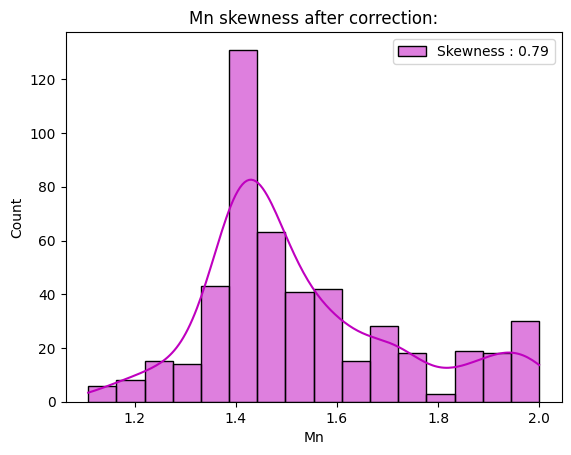

In [32]:
X_train['Mn'] = X_train['Mn'].map(lambda i: np.log(i) if i> 0 else 0)

g = sns.histplot(X_train['Mn'], color='m', label='Skewness : %.2f'%(X_train['Mn'].skew()), kde=True)
g.legend(loc='best')
g.set_title("Mn skewness after correction:")

In [33]:
scaler = MinMaxScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

<Axes: >

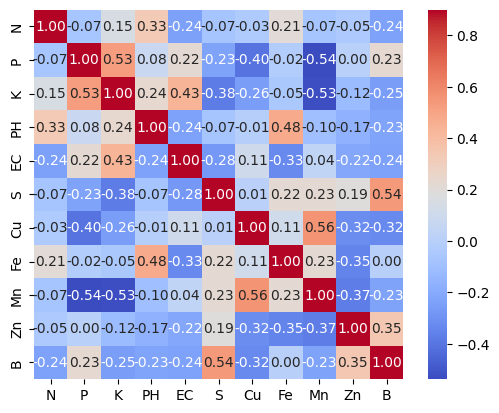

In [34]:
corrmat = X_train.corr()
# plt.subplot(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.9, square = True, annot = True, fmt = '.2f', cmap = 'coolwarm')

**The pairplot garph indicate a linear division.**

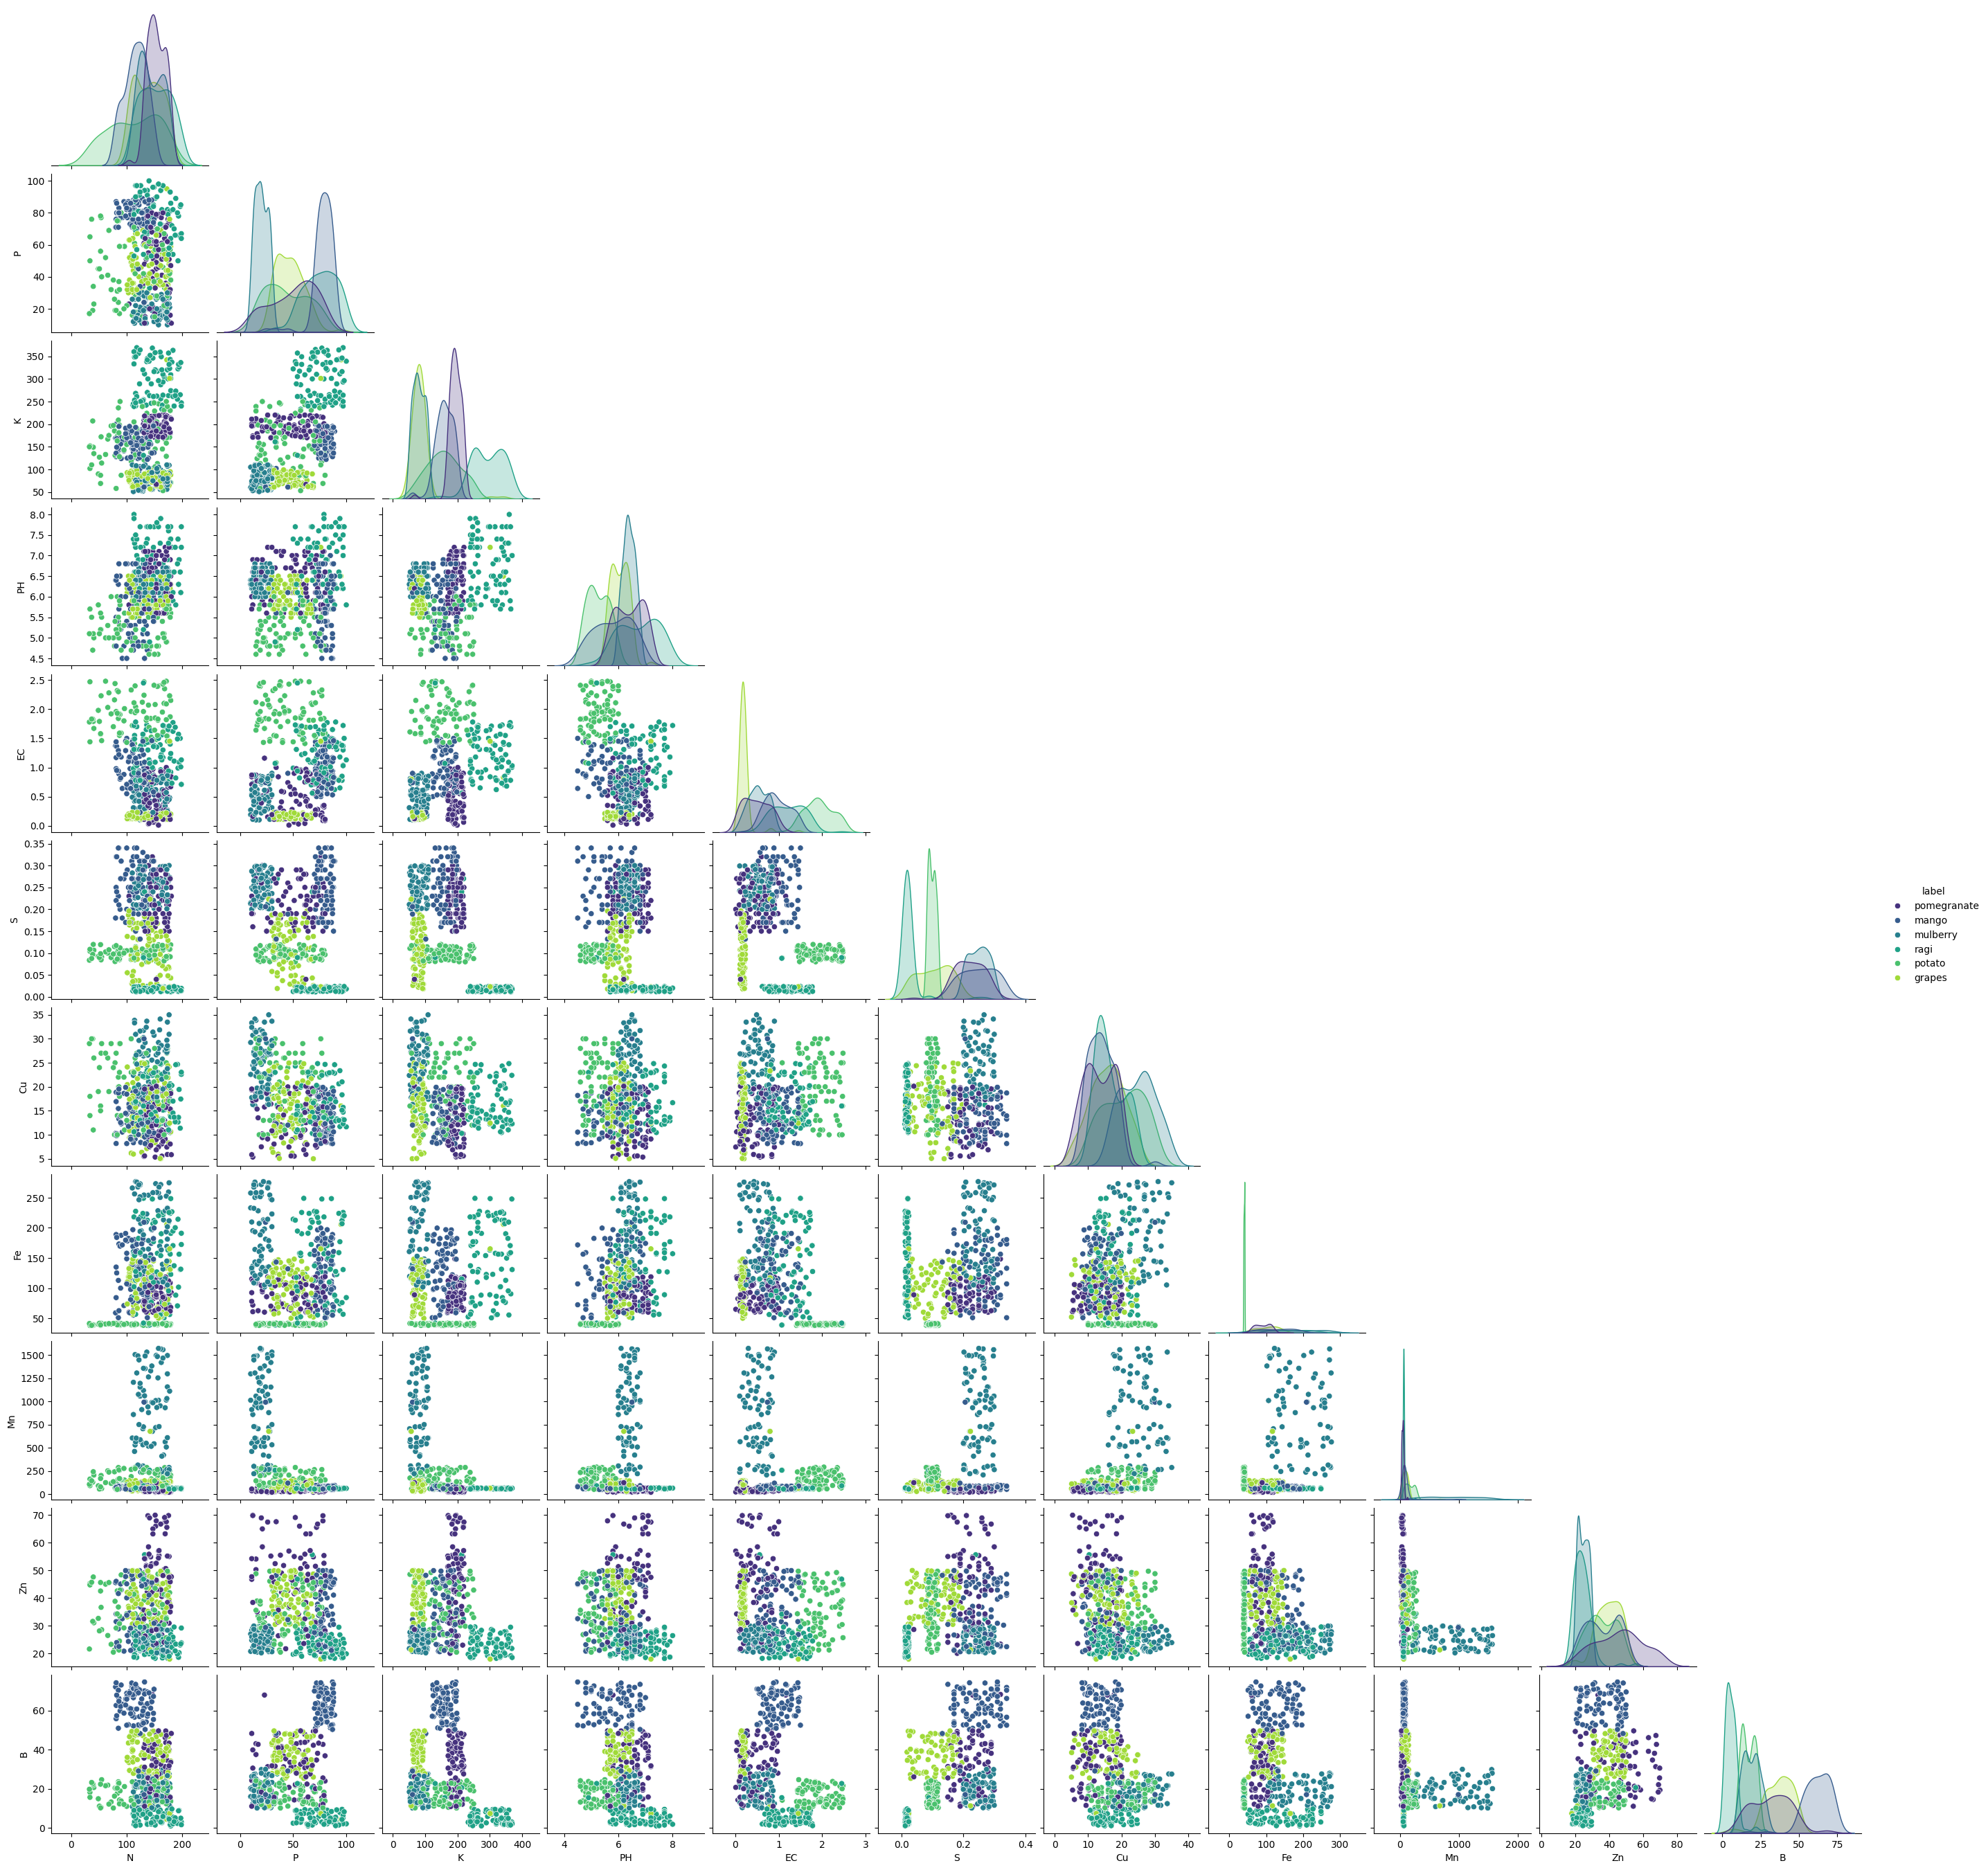

In [35]:
sns.pairplot(train, hue='label', palette='viridis', corner=True)

In [36]:
train['label']

0      pomegranate
1            mango
2         mulberry
3             ragi
4           potato
          ...     
489           ragi
490           ragi
491          mango
492         grapes
493          mango
Name: label, Length: 494, dtype: object

<Axes: >

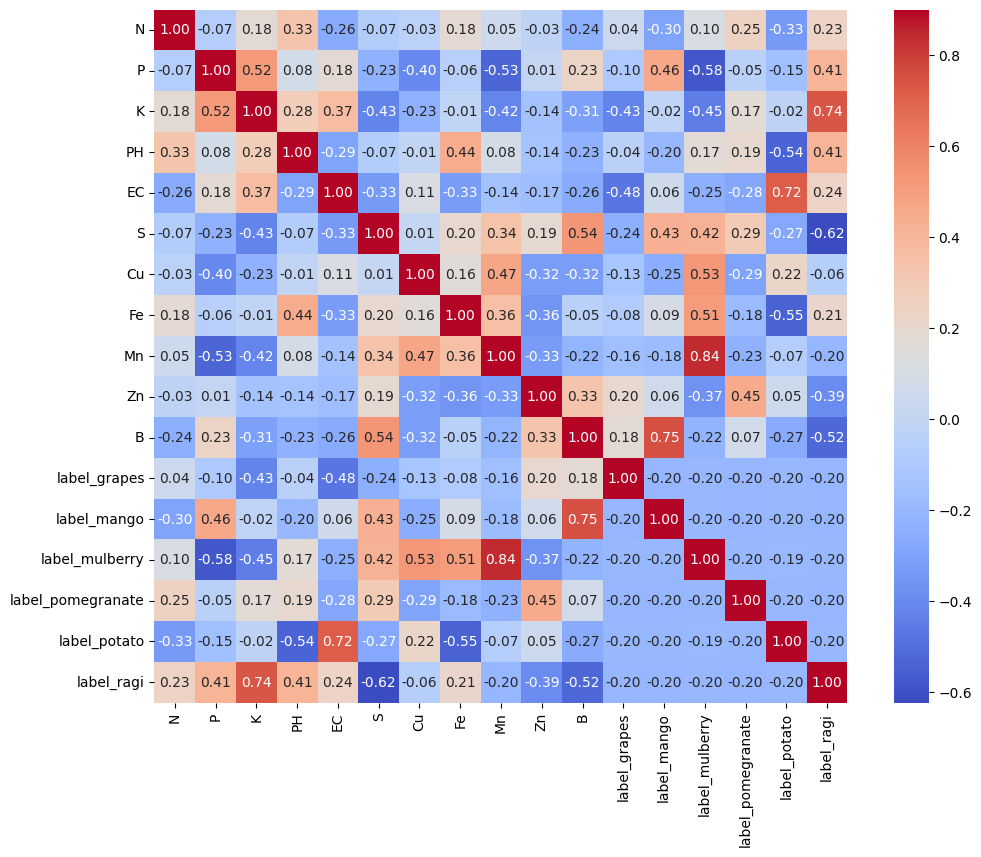

In [37]:
train = pd.get_dummies(train, drop_first=False, columns=['label'])

corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt=".2f", cmap = "coolwarm")

* Mango is associative with high `Boron (B)`.

* Mulberry is associative with high `Manganese (Mn)`.

* Ragi is associative with high `Potassium (K)`.

* Potato is associative with high `electrical conducativity (EC)`.

**Visualizstion of data by label (t-SNE)**

In [38]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_train_scaler)
tsne.shape

(494, 2)

In [39]:
X_train.shape

(494, 11)

In [40]:
tsne = np.array(tsne)

In [41]:
tsne = pd.DataFrame(tsne, columns=['X1', 'X2'])

In [42]:
tsne

X1      X2
0    -1.346  -6.000
1     7.494 -12.263
2   -15.200 -33.339
3    32.314  17.954
4    -2.562  29.364
..      ...     ...
489  29.710  12.269
490  31.226  17.554
491  10.234  -7.766
492 -23.400  -0.601
493  10.521 -13.668

[494 rows x 2 columns]

[Text(0.5, 0, 'X1'),
 Text(0, 0.5, 'X2'),
 Text(0.5, 1.0, 'Visualization of data in two dimensions by t-SNE')]

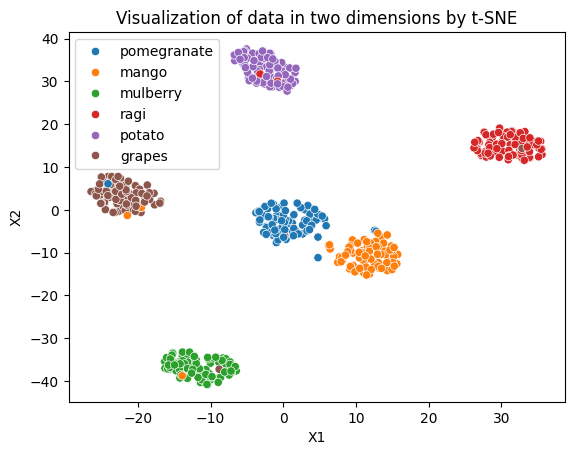

In [43]:
g = sns.scatterplot(data=tsne, x='X1', y='X2', hue=y_train.values)
g.set(xlabel='X1', ylabel='X2', title='Visualization of data in two dimensions by t-SNE')

`Data Modeling`

**Important Library `import`**

In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.metrics import ConfusionMatrixDisplay

In [46]:
label_encoding = LabelEncoder()
y_train_data = label_encoding.fit_transform(y_train)

In [47]:
param_grid = {'max_depth': [2, 3, 4, 5, 6, 10, 100, 300], 'n_estimators':[100, 500, 1000]}  # what about n_estimators?? 
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid)
rf_model.fit(X_train, y_train)
print(f"Best estimators for Random Forest: {rf_model.best_estimator_}")

# choosing best estimators for AdaBoost model:
param_grid = {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.1, 0.2, 0.5, 0.7, 0.8, 1]}  
ada_model = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid)
ada_model.fit(X_train, y_train)
print(f"Best estimators for AdaBoost: {ada_model.best_estimator_}")

# choosing best estimators for svm model: 
param_grid = {'kernel': ['linear','poly','rbf'], 'C': [0.001, 0.01, 0.1, 1, 10],
                  'gamma': [1, 0.1]}  
svm_model = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid)
svm_model.fit(X_train_scaler, y_train)
print(f"Best estimators for SVM: {svm_model.best_estimator_}")

# choosing best estimators for KNN model:
param_grid = {'n_neighbors': list(range(3, 16, 2))}  
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid)
knn_model.fit(X_train_scaler, y_train)
print(f"Best estimators for K-Nearest Neighbor: {knn_model.best_estimator_}")

# choosing best estimators for Gradient Boosting model:
param_grid = {'n_estimators': [10, 20, 50, 100, 300, 500], 'learning_rate': [0.1, 0.8, 1], 'max_depth' : [1, 2, 3, 5]}  
gb_model = GridSearchCV(XGBClassifier(random_state=42), param_grid)
gb_model.fit(X_train, y_train_data)
print(f"Best estimators for Gradient Boosting: {gb_model.best_estimator_}")

Best estimators for Random Forest: RandomForestClassifier(max_depth=2, random_state=42)


c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Best estimators for AdaBoost: AdaBoostClassifier(learning_rate=0.2, n_estimators=20, random_state=42)
Best estimators for SVM: SVC(C=0.1, class_weight='balanced', gamma=1, kernel='poly', random_state=42)
Best estimators for K-Nearest Neighbor: KNeighborsClassifier(n_neighbors=7)
Best estimators for Gradient Boosting: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jo

In [48]:
rf = RandomForestClassifier(max_depth=2, random_state=42)
ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)
svm = SVC(kernel='poly', C=0.1, class_weight='balanced', gamma=1, probability=True, random_state=42)  
knn = KNeighborsClassifier(n_neighbors=7)
log = LogisticRegression(max_iter=400, random_state=42)
gb = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=1, random_state=42)

In [49]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring='f1_micro',
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("f1 Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_micro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt, test_scores_mean, test_scores_std

c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages

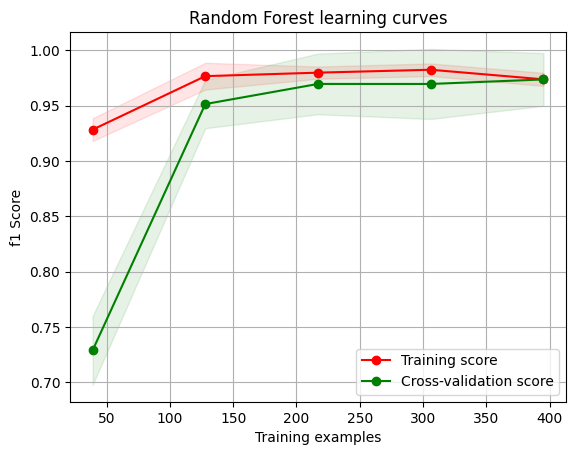

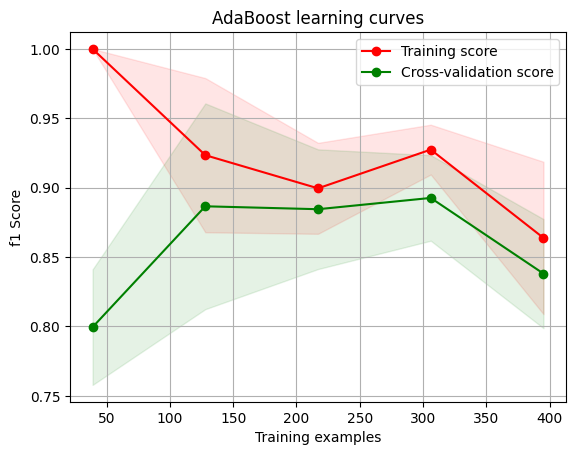

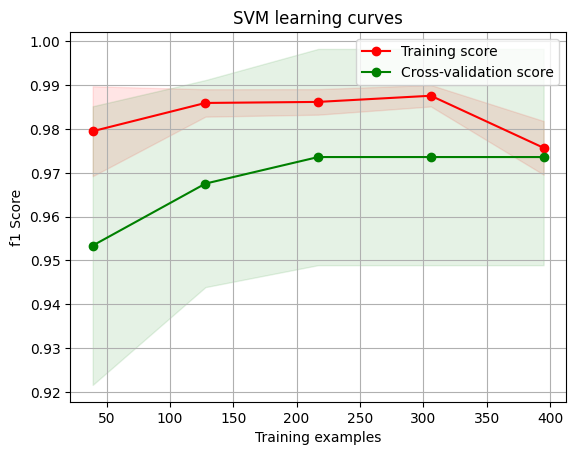

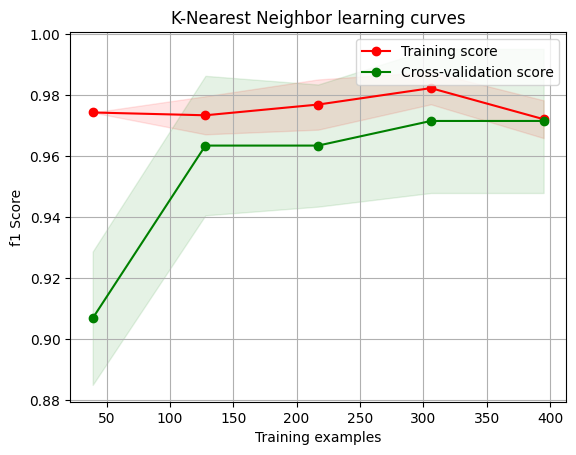

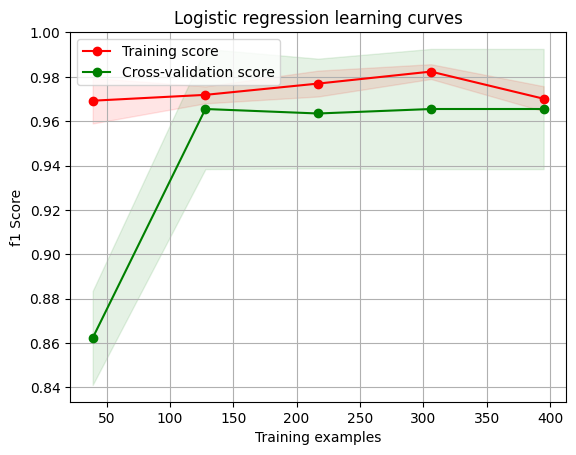

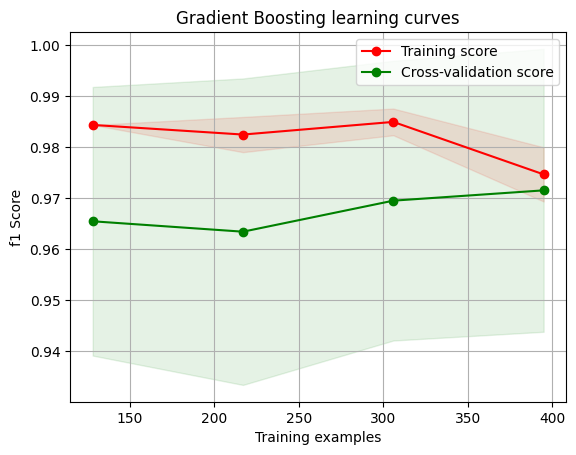

In [50]:
g, rf_mean, rf_std = plot_learning_curve(rf,"Random Forest learning curves",X_train,y_train,cv=5)
g, ada_mean, ada_std = plot_learning_curve(ada,"AdaBoost learning curves",X_train,y_train,cv=5)
g, svm_mean, svm_std = plot_learning_curve(svm,"SVM learning curves",X_train_scaler,y_train,cv=5)
g, knn_mean, knn_std = plot_learning_curve(knn,"K-Nearest Neighbor learning curves",X_train_scaler,y_train,cv=5)
g, log_mean, log_std = plot_learning_curve(log,"Logistic regression learning curves",X_train_scaler,y_train,cv=5)
g, gb_mean, gb_std = plot_learning_curve(gb,"Gradient Boosting learning curves",X_train,y_train_data,cv=5)

In [51]:
print(f"\nRandom Forest score: {rf_mean.mean():.2f} ({rf_std.mean():.2f})\n")
print(f"\nAdaBoost score: {ada_mean.mean():.2f} ({ada_std.mean():.2f})\n")
print(f"\nSVM score: {svm_mean.mean():.2f} ({svm_std.mean():.2f})\n")
print(f"\nK-Nearest Neighbor score: {knn_mean.mean():.2f} ({knn_std.mean():.2f})\n")
print(f"\nLogistic Regression score: {log_mean.mean():.2f} ({log_std.mean():.2f})\n")
print(f"\nGradient Boosting score: {gb_mean.mean():.2f} ({gb_std.mean():.2f})\n")


Random Forest score: 0.92 (0.03)


AdaBoost score: 0.86 (0.05)


SVM score: 0.97 (0.03)


K-Nearest Neighbor score: 0.96 (0.02)


Logistic Regression score: 0.94 (0.03)


Gradient Boosting score: nan (nan)



In [52]:
estimators = [('svm_stck', make_pipeline(scaler, SVC(kernel='linear', C=1, class_weight='balanced', gamma=1, probability=True, random_state=42))),
              ('knn_stck', make_pipeline(scaler, KNeighborsClassifier(n_neighbors=3))), 
              ('gb_stck', XGBClassifier(max_depth=1, n_estimators=50, random_state=42, learning_rate=0.1))]


X_train80, X_val, y_train80, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42, stratify=y_train)

In [53]:
final_estimator = LogisticRegression(max_iter=400) 

stck = StackingClassifier(estimators=estimators, final_estimator=final_estimator, stack_method='predict')

accuracy = stck.fit(X_train80, y_train80).score(X_val, y_val)
print(f"\nStacking model accuracy: {accuracy:.2f}\n")

stck_pred = stck.predict(X_val)
f1 = f1_score(y_val, stck_pred, average='macro')
print(f"\nStacking model f1 score: {f1:.2f}\n")


Stacking model accuracy: 0.92


Stacking model f1 score: 0.92



In [54]:
vote = VotingClassifier(estimators=estimators, voting='soft')
accuracy = vote.fit(X_train80, y_train80).score(X_val, y_val)
print(f"\nMajority vote accuracy: {accuracy:.2f}\n")

vote_pred = vote.predict(X_val)
f1 = f1_score(y_val, vote_pred, average='macro')
print(f"\nMajority vote model f1 score: {f1:.2f}\n")


Majority vote accuracy: 0.93


Majority vote model f1 score: 0.93



In [55]:
X_train_roc, X_val_roc, y_train_roc, y_val_roc = train_test_split(X_train, y_train, train_size=0.8, random_state=42, stratify=y_train)

c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


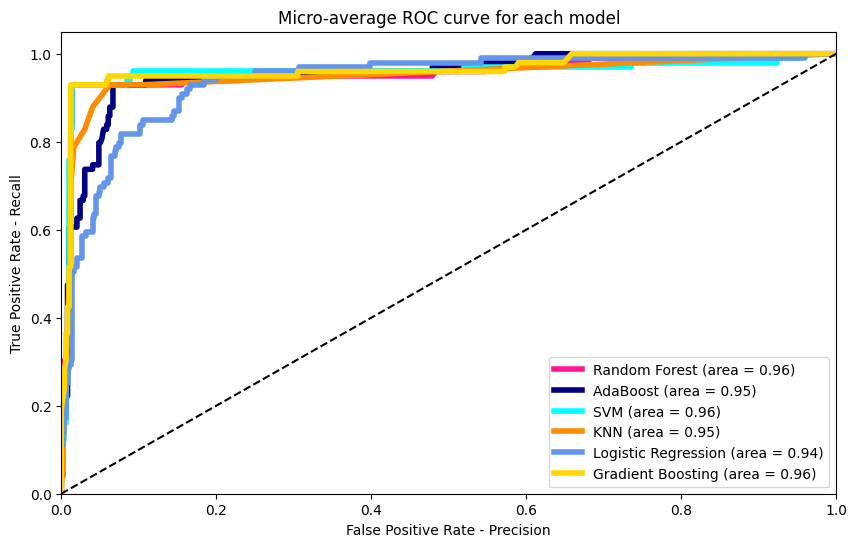

In [56]:
list_of_models = [rf, ada, svm, knn, log, gb] 
names_of_models = ["Random Forest", "AdaBoost", "SVM", "KNN", "Logistic Regression", "Gradient Boosting"] 
colors = ['deeppink', 'navy', 'aqua', 'darkorange', 'cornflowerblue', 'gold'] 


def roc_for_each_model_micro(y_test, X_test, list_of_models, names_of_models, colors, X_train, y_train):
    y_test_num = y_test.map({'pomegranate':0, 'mango':1, 'grapes':2, 'mulberry':3, 'ragi':4, 'potato':5})
    y_train_num = y_train.map({'pomegranate':0, 'mango':1, 'grapes':2, 'mulberry':3, 'ragi':4, 'potato':5})
    y_test_bin = label_binarize(y_test_num, classes=np.arange(6))

    plt.figure(figsize=(10,6))

    for i, (model, name, color) in enumerate(zip(list_of_models, names_of_models, colors)): 
        if model in [svm, knn, log]:
            X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
            X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

        y_prob = model.fit(X_train, y_train_num).predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
        roc_auc = auc(fpr, tpr)

        plt.plot(
              fpr,
              tpr,
              label=f"{name} (area = {roc_auc:.2f})",
              color=color,
              linestyle="-",
              linewidth=4,
            )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate - Precision")
    plt.ylabel("True Positive Rate - Recall")
    plt.title("Micro-average ROC curve for each model")
    plt.legend(loc="lower right")
    plt.show()

roc_for_each_model_micro(y_val_roc, X_val_roc, list_of_models, names_of_models, colors, X_train_roc, y_train_roc)

c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


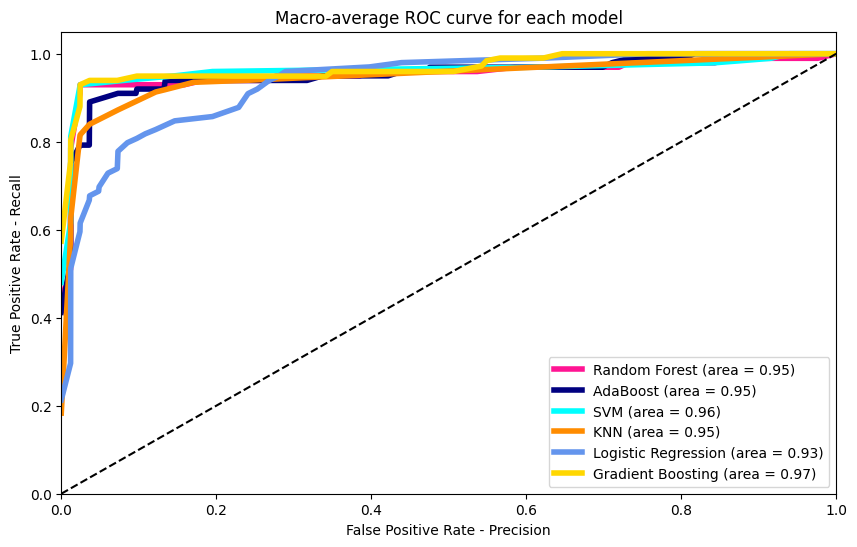

In [57]:
list_of_models = [rf, ada, svm, knn, log, gb] 
names_of_models = ["Random Forest", "AdaBoost", "SVM", "KNN", "Logistic Regression", "Gradient Boosting"] 
colors = ['deeppink', 'navy', 'aqua', 'darkorange', 'cornflowerblue', 'gold'] 

def roc_for_each_model_macro(y_test, X_test, list_of_models, names_of_models, colors, X_train, y_train):
    y_test_num = y_test.map({'pomegranate':0, 'mango':1, 'grapes':2, 'mulberry':3, 'ragi':4, 'potato':5})
    y_train_num = y_train.map({'pomegranate':0, 'mango':1, 'grapes':2, 'mulberry':3, 'ragi':4, 'potato':5})
    y_test_bin = label_binarize(y_test_num, classes=np.arange(6))

    plt.figure(figsize=(10,6))

    n_classes = len(np.unique(y_train))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i, (model, name, color) in enumerate(zip(list_of_models, names_of_models, colors)): 
        if model in [svm, knn, log]:
            X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
            X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

        y_prob = model.fit(X_train, y_train_num).predict_proba(X_test)
        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_prob[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])
        fpr['micro'], tpr['micro'], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
        roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for j in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[j], tpr[j])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        plt.plot(
              fpr['macro'],
              tpr['macro'],
              label=f"{name} (area = {roc_auc['macro']:.2f})",
              color=color,
              linestyle="-",
              linewidth=4)

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate - Precision")
    plt.ylabel("True Positive Rate - Recall")
    plt.title("Macro-average ROC curve for each model")
    plt.legend(loc="lower right")
    plt.show()

roc_for_each_model_macro(y_val_roc, X_val_roc, list_of_models, names_of_models, colors, X_train_roc, y_train_roc)

**`Result`**

In [58]:
X_test['Mn']= stats.boxcox(X_test['Mn'], lmbda=0.001)
X_test['Zn']= stats.boxcox(X_test['Zn'], lmbda=0.5)
X_test['Fe']= stats.boxcox(X_test['Fe'], lmbda=0.5)
X_test['K']= stats.boxcox(X_test['K'], lmbda=0.5)
X_test['EC']= stats.boxcox(X_test['EC'], lmbda=0.5)

X_test['Mn'] = X_test['Mn'].map(lambda i: np.log(i) if i> 0 else 0)

In [59]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [60]:
y_test_data = label_encoding.fit_transform(y_test)

Micro-average ROC curve for each model - on TEST:


c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


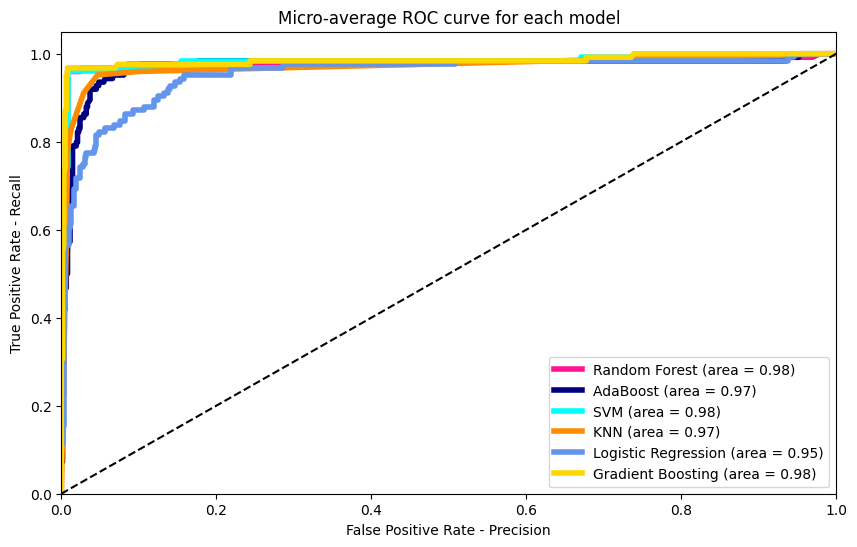

Macro-average ROC curve for each model - on TEST:


c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


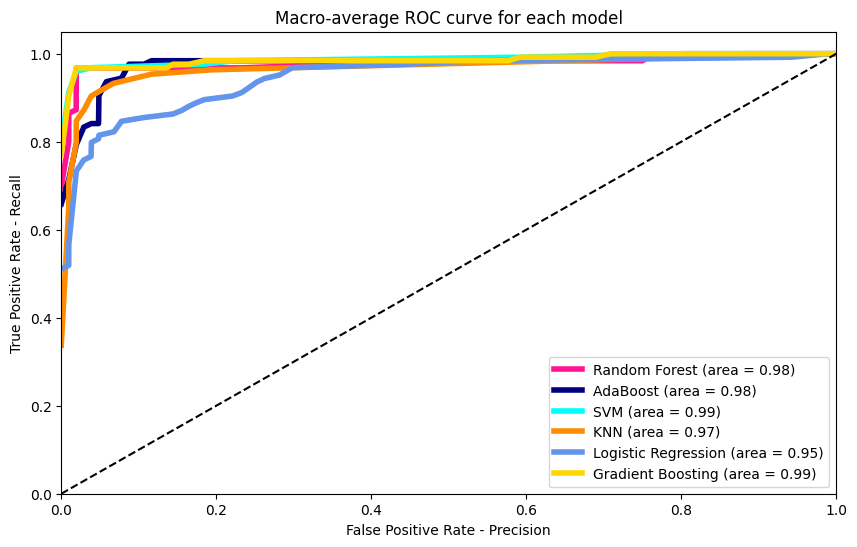

In [61]:
print('Micro-average ROC curve for each model - on TEST:')
roc_for_each_model_micro(y_test, X_test, list_of_models, names_of_models, colors, X_train, y_train)
print('Macro-average ROC curve for each model - on TEST:')
roc_for_each_model_macro(y_test, X_test, list_of_models, names_of_models, colors, X_train, y_train)

c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


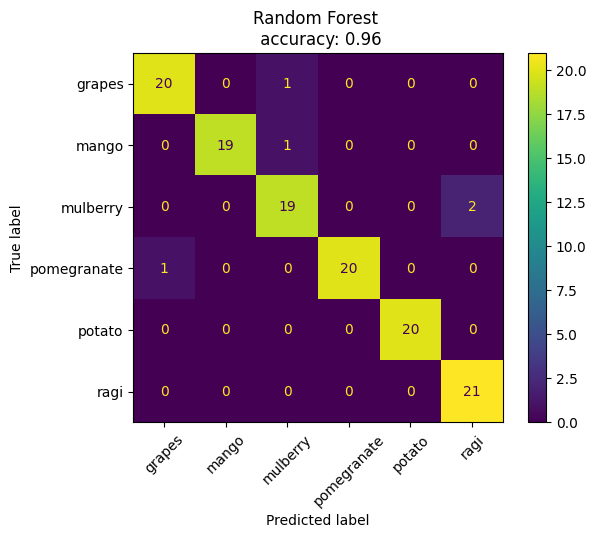

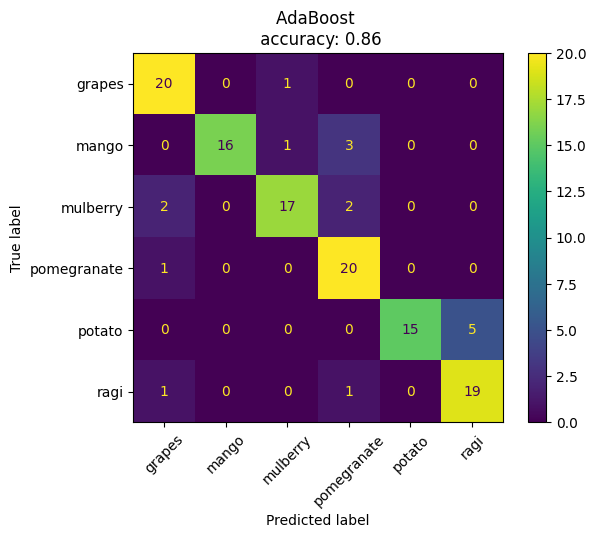

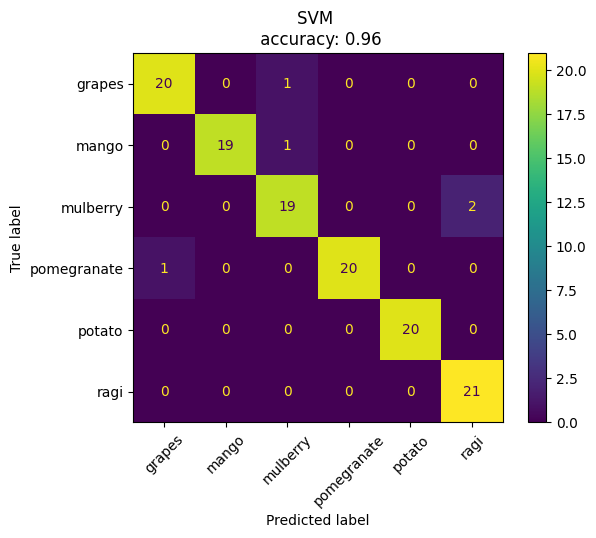

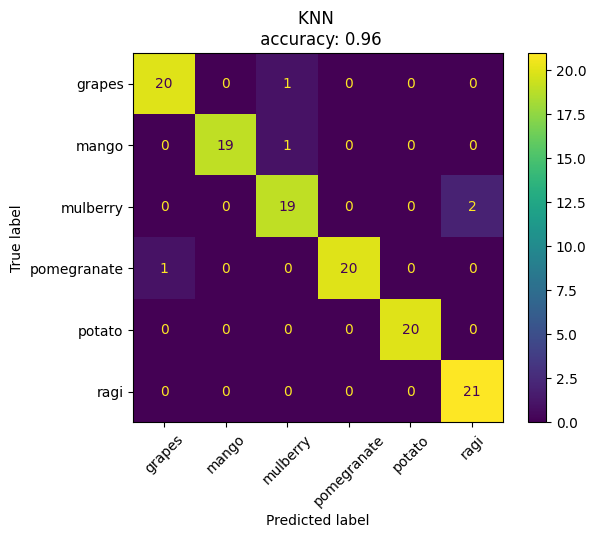

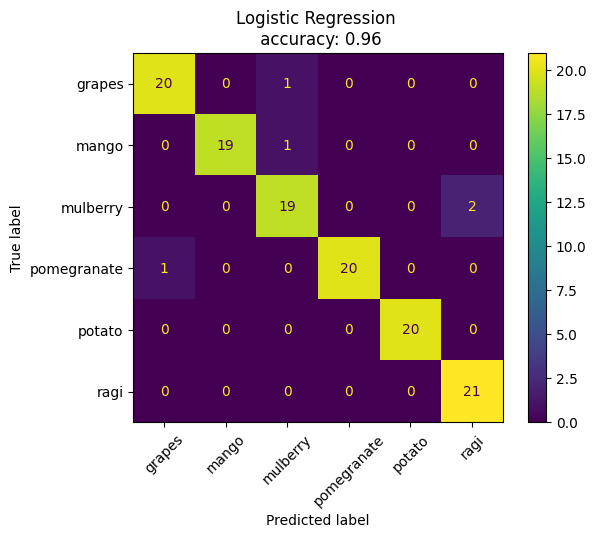

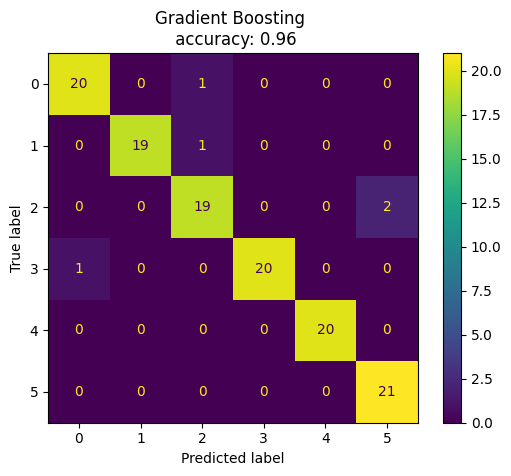

In [62]:
models = [rf, ada, svm, knn, log, gb] 
names = ["Random Forest", "AdaBoost", "SVM", "KNN", "Logistic Regression", "Gradient Boosting"] 


for model, name in zip(models, names):
    
    if model in [svm, knn, log]:
        y_pred = model.fit(X_train_scaler, y_train).predict(X_test_scaled)
        fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
        fig.ax_.set_title(f"{name} \n accuracy: {model.score(X_test_scaled, y_test):.2f}")

    elif model == gb:
        y_pred = model.fit(X_train, y_train_data).predict(X_test)
        fig = ConfusionMatrixDisplay.from_predictions(y_test_data, y_pred)
        fig.ax_.set_title(f"{name} \n accuracy: {model.score(X_test, y_test_data):.2f}")
        
    else:
        y_pred = model.fit(X_train, y_train).predict(X_test)
        fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
        fig.ax_.set_title(f"{name} \n accuracy: {model.score(X_test, y_test):.2f}")
        
plt.show()

In [63]:
for model, name in zip(models, names):
    if model in [svm, knn, log]:
        score = model.score(X_test_scaled, y_test)
        print(f"\n{name} score: {score:.2f}\n")
    elif model == gb:
        score = model.score(X_test, y_test_data)
        print(f"\n{name} score: {score:.2f}\n")
    else:
        score = model.score(X_test, y_test)
        print(f"\n{name} score: {score:.2f}\n")


Random Forest score: 0.96


AdaBoost score: 0.86


SVM score: 0.96


KNN score: 0.96


Logistic Regression score: 0.96


Gradient Boosting score: 0.96

